# RV Correlation for individual orders

Calculation of correlation between RVs of individual
orders and SDO derived RVs and magnetic observables (flux, filling factor).

In [32]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import tamar.tools.plotting_funcs as plot
from tamar.tools.settings import CsvDir, PlotDir

Read in data.

In [7]:
# csv file with rv components
csv_file = os.path.join(CsvDir.NEID_CALC, 'order_rvs.csv')

Get component lists.

In [8]:
# create pandas dataframe
component_df = pd.read_csv(csv_file)

# get dates list
dates = component_df.date_obs.values
date_jd = component_df.date_jd.values
date_plot = date_jd - date_jd[0]

# get velocities lists
# v_phot = component_df.v_phot.values
# v_conv = component_df.v_conv.values
rv_sun = component_df.rv_sun.values * 1000
rv_error = component_df.rv_error.values
# rv_model  = component_df.rv_model.values

# get magnetic observables
# f = component_df.f.values
# Bobs = component_df.Bobs.values
# f_bright = component_df.f_bright.values
# f_spot = component_df.f_spot.values

Get RVs for each order.

In [9]:
rv_orders = []
rv_std = []
order_numbers = np.arange(57, 170)
for i in order_numbers:
    i = str(i)
    i = i.zfill(3)
    rv_orders.append(component_df[i] * 1000)
    rv_std.append(np.std(component_df[i]) * 1000)

Get calculation info from calculation csv.

In [10]:
# data csv
data_csv = os.path.join(CsvDir.NEID_CALC, 'rvs_from_fits.csv')

# create pandas dataframe
data_df = pd.read_csv(data_csv)

# get dates list
# dates = component_df.date_obs.values
# date_jd = component_df.date_jd.values
# date_plot = date_jd - date_jd[0]

# get velocities lists
v_phot = data_df.v_phot.values[0:len(dates)]
v_conv = data_df.v_conv.values[0:len(dates)]
# rv_sun = component_df.rv_sun.values * 1000
# rv_error = component_df.rv_error.values
# rv_model  = data_df.rv_model.values[0:len(dates)]
# rv_model_harps  = data_df.rv_model_harps.values[0:len(dates)]

# get magnetic observables
f = data_df.f.values[0:len(dates)]
Bobs = data_df.Bobs.values[0:len(dates)]
f_bright = data_df.f_bright.values[0:len(dates)]
f_spot = data_df.f_spot.values[0:len(dates)]


## Correlation between order RVs and velocities.

### Correlation between Order RVs and NEID RVs

In [11]:
rvsun_corr = []
for rvs in rv_orders:
    x = rv_sun
    y = rvs
    correlation = stats.spearmanr(x, y)
    rvsun_corr.append(correlation[0])

rvsun_corr = np.where(np.isnan(rvsun_corr), 0, rvsun_corr)

/Users/tervin/opt/anaconda3/envs/neid_Data/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


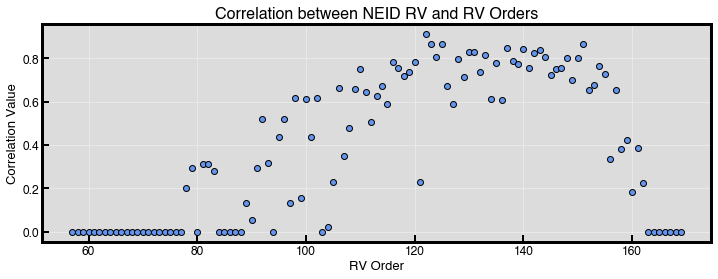

In [12]:
x = order_numbers
y = rvsun_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between NEID RV and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

### Correlation between Order RVs and Sunspot Filling Factor

In [13]:
fspot_corr = []
for rvs in rv_orders:
    x = f_spot
    y = rvs
    correlation = stats.spearmanr(x, y)
    fspot_corr.append(correlation[0])

fspot_corr = np.where(np.isnan(fspot_corr), 0, fspot_corr)

/Users/tervin/opt/anaconda3/envs/neid_Data/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


32

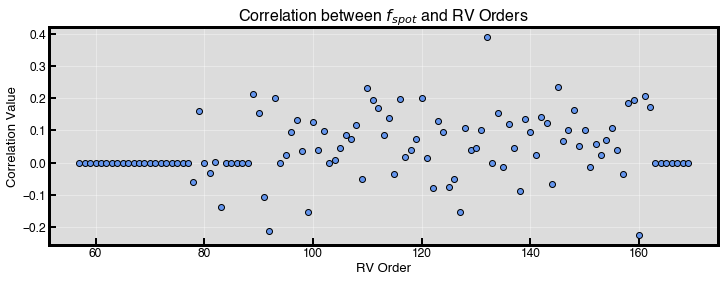

In [14]:
x = order_numbers
y = fspot_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between $f_{spot}$ and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)
np.argmax(fspot_corr[0:50])

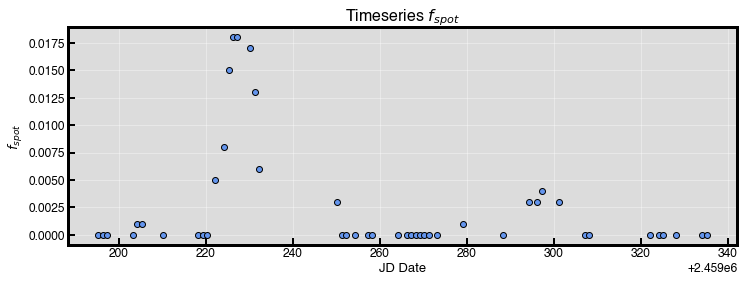

In [15]:
x = date_jd
y = f_spot
xlabel = 'JD Date'
ylabel = '$f_{spot}$'
title = 'Timeseries $f_{spot}$'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

In [16]:
# ordered from least to most correlated
spots_ord = np.argsort(np.abs(fspot_corr))
# print(fspot_corr[spots_ord])

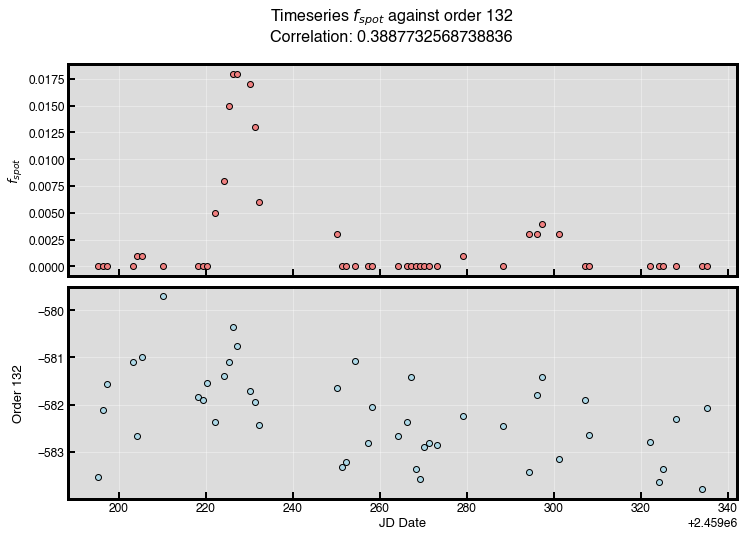

In [17]:
i = spots_ord[-1]
x = date_jd
y_list = [f_spot, rv_orders[i]]
xlabel = 'JD Date'
ylabel_list = ['$f_{spot}$', 'Order ' + str(order_numbers[i])]
title = 'Timeseries $f_{spot}$ against order ' + str(order_numbers[i]) + '\nCorrelation: ' + str(fspot_corr[i])

# plot this
# save_fig = '/Users/tervin/images/neid/orders/spot_corr_160.png'
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

### Correlation between Order RVs and Faculae Filling Factor

In [18]:
fbright_corr = []
for rvs in rv_orders:
    x = f_bright
    y = rvs
    correlation = stats.spearmanr(x, y)
    fbright_corr.append(correlation[0])

fbright_corr = np.where(np.isnan(fbright_corr), 0, fbright_corr)

/Users/tervin/opt/anaconda3/envs/neid_Data/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


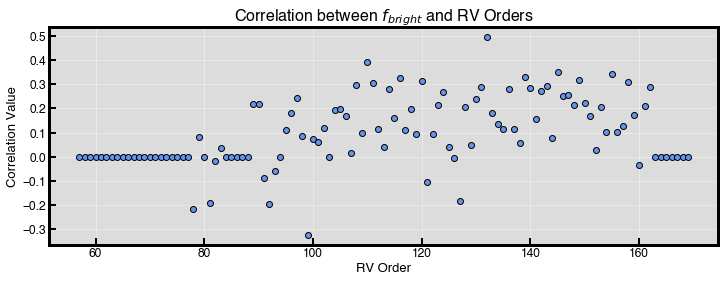

In [19]:
x = order_numbers
y = fbright_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between $f_{bright}$ and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

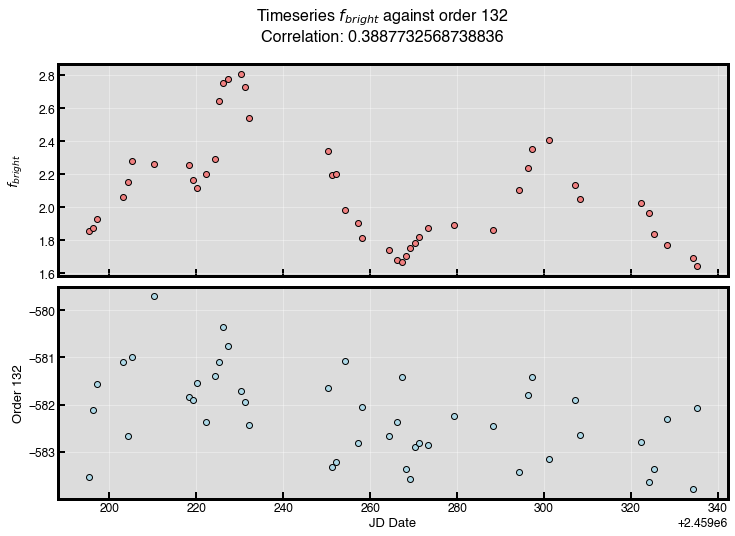

In [20]:
# test = np.array(fspot_corr[0:50] + fspot_corr[51:])
i = np.argmax(fbright_corr)

# spots = np.logical_and(f_spot!=0, f_spot>0)
x = date_jd
y_list = [f_bright, rv_orders[i]]
xlabel = 'JD Date'
ylabel_list = ['$f_{bright}$', 'Order ' + str(order_numbers[i])]
title = 'Timeseries $f_{bright}$ against order ' + str(order_numbers[i]) + '\nCorrelation: ' + str(fspot_corr[i])

# plot this
# save_fig = '/Users/tervin/images/neid/orders/spot_corr_121.png'
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

In [21]:
print(len(rv_orders))

113


### Correlation between Order RVs and Model RVs

In [22]:
rvmodel_corr = []
for rvs in rv_orders:
    x = rv_model
    y = rvs
    correlation = stats.spearmanr(x, y)
    rvmodel_corr.append(correlation[0])

rvmodel_corr = np.where(np.isnan(rvmodel_corr), 0, rvmodel_corr)

NameError: name 'rv_model' is not defined

In [ ]:
x = order_numbers
y = rvmodel_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between RV Model and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

### Correlation between Order RVs and HARPS Coefficient Model RVs

In [ ]:
rvmodelharps_corr = []
for rvs in rv_orders:
    x = rv_model_harps
    y = rvs
    correlation = stats.spearmanr(x, y)
    rvmodelharps_corr.append(correlation[0])

rvmodelharps_corr = np.where(np.isnan(rvmodelharps_corr), 0, rvmodelharps_corr)

In [ ]:
x = order_numbers
y = rvmodelharps_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between HARPS RV Model and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

### Correlation between Order RVs and $B_{obs}$

In [23]:
Bobs_corr = []
for rvs in rv_orders:
    x = Bobs
    y = rvs
    correlation = stats.spearmanr(x, y)
    Bobs_corr.append(correlation[0])

Bobs_corr = np.where(np.isnan(Bobs_corr), 0, Bobs_corr)


/Users/tervin/opt/anaconda3/envs/neid_Data/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


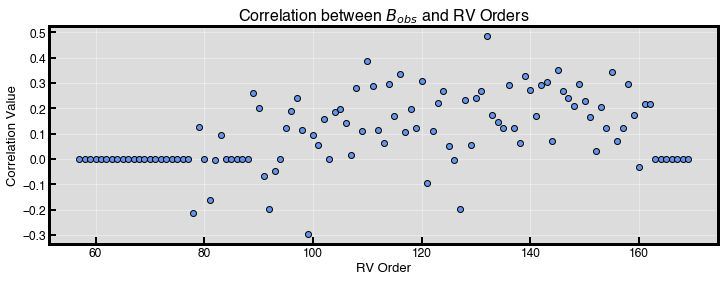

In [24]:
x = order_numbers
y = Bobs_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between $B_{obs}$ and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

### Correlation between Order RVs and $v_{conv}$

In [ ]:
vconv_corr = []
for rvs in rv_orders:
    x = v_conv
    y = rvs
    correlation = stats.spearmanr(x, y)
    vconv_corr.append(correlation[0])

vconv_corr = np.where(np.isnan(vconv_corr), 0, vconv_corr)

In [ ]:
x = order_numbers
y = vconv_corr
xlabel = 'RV Order'
ylabel = 'Correlation Value'
title = 'Correlation between $v_{conv}$ and RV Orders'

# plot this
plot.plot_timeseries(x, y, title, xlabel, ylabel)

## Find orders with strongest correlation

In [25]:
corr = [rvsun_corr, rvmodel_corr, vconv_corr,  fspot_corr, fbright_corr, Bobs_corr]
ords = []
for c in corr:
    ords.append(np.argsort(np.abs(c)))
c_name = ['rvsun', 'rvmodel', 'vconv', 'fspot', 'fbright', 'Bobs']
best = [order_numbers[o[-5:]] for o in ords]
for i, b in enumerate(best):
    print(c_name[i], 'best correlation orders:', b)

NameError: name 'vconv_corr' is not defined

In [26]:
from sklearn.cluster import KMeans

### Order RVs and Unsigned Flux

In [29]:
X = np.array(Bobs_corr)
X = np.where(np.isnan(X), 0, X)

In [30]:
X = X.reshape(-1, 1)

kmeans = KMeans(n_clusters = 3, init='k-means++').fit(X)

Plot this labeling.

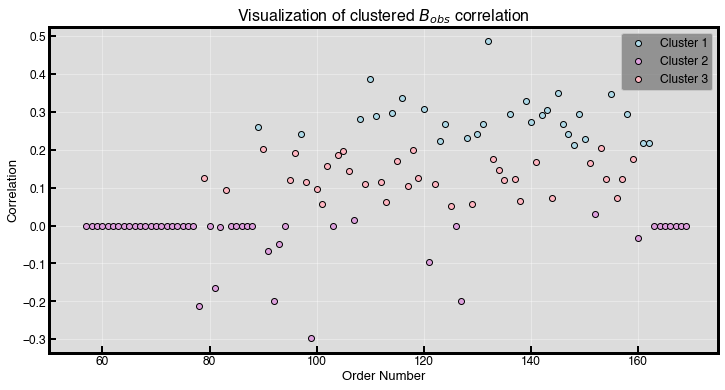

In [33]:
plot_style = os.path.join(PlotDir.MPL, 'timeseries.mplstyle')
plt.style.use(plot_style)
plt.rcParams['figure.figsize'] = [12, 6]
plt.scatter(order_numbers[kmeans.labels_ == 0], X[kmeans.labels_ == 0],
            c='lightblue', label='Cluster 1', edgecolors='k', linewidths=1.0)
plt.scatter(order_numbers[kmeans.labels_ == 1], X[kmeans.labels_ == 1],
            c='plum', label='Cluster 2', edgecolors='k', linewidths=1.0)
plt.scatter(order_numbers[kmeans.labels_ == 2], X[kmeans.labels_ == 2],
            c='lightpink', label='Cluster 3', edgecolors='k', linewidths=1.0)


plt.xlim([50, 175])
plt.xlabel('Order Number')
plt.ylabel('Correlation')
plt.title('Visualization of clustered $B_{obs}$ correlation', fontweight='bold')
# plt.savefig('/Users/tervin/images/neid/orders/Bobs.png')
plt.legend()

Get "good" correlation orders.

In [34]:
# figure out which cluster is the "good" orders
good_label = np.argmax(Bobs_corr)
good_label = kmeans.labels_[good_label]

good_Bobs_orders = order_numbers[kmeans.labels_ == good_label]
good_Bobs_coeff = Bobs_corr[kmeans.labels_ == good_label]

### Order RVs and NEID RVs

In [35]:
X = np.array(rvsun_corr)
X = np.where(np.isnan(X), 0, X)

In [36]:
X = X.reshape(-1, 1)

kmeans = KMeans(n_clusters = 3, init='k-means++').fit(X)

Plot this labeling.

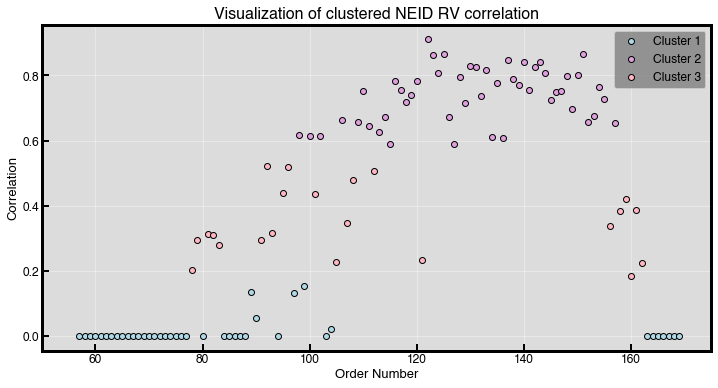

In [38]:
plt.style.use(plot_style)
plt.rcParams['figure.figsize'] = [12, 6]
plt.scatter(order_numbers[kmeans.labels_ == 0], X[kmeans.labels_ == 0],
            c='lightblue', label='Cluster 1', edgecolors='k', linewidths=1.0)
plt.scatter(order_numbers[kmeans.labels_ == 1], X[kmeans.labels_ == 1],
            c='plum', label='Cluster 2', edgecolors='k', linewidths=1.0)
plt.scatter(order_numbers[kmeans.labels_ == 2], X[kmeans.labels_ == 2],
            c='lightpink', label='Cluster 3', edgecolors='k', linewidths=1.0)


plt.xlim([50, 175])
plt.xlabel('Order Number')
plt.ylabel('Correlation')
plt.title('Visualization of clustered NEID RV correlation', fontweight='bold')
# plt.savefig('/Users/tervin/images/neid/orders/RVs.png')
plt.legend()

Get "good" correlation orders.

In [39]:
# figure out which cluster is the "good" orders
good_label = np.argmax(rvsun_corr)
good_label = kmeans.labels_[good_label]

good_rvsun_orders = order_numbers[kmeans.labels_ == good_label]
good_rvsun_coeff = Bobs_corr[kmeans.labels_ == good_label]


### Compare good orders

In [ ]:
print('Good Unsigned Flux orders:', good_Bobs_orders)
print('Good NEID RV orders:', good_rvsun_orders)

In [ ]:
good_both_orders = np.isin(good_Bobs_orders, good_rvsun_orders)
good_both_orders = good_Bobs_orders[good_both_orders]

print('Good orders:', good_both_orders)

Plot the good orders.

In [ ]:
good_inds = np.isin(order_numbers, good_both_orders)
x = order_numbers[good_inds]



In [ ]:
for ind, order in enumerate(x):
    # wvl_norm = 1. - (np.mean(wvl[ind,:]) - 420.) / (720. - 420.)
    i = str(order)
    i = i.zfill(3)
    rv_ord = component_df[i] * 1e3
    rv_ord_plot = rv_ord - np.median(rv_ord) + ind  # offset the median value for plotting purposes
    plt.plot(date_plot, rv_ord_plot, 'k', lw=3)
    plt.plot(date_plot, rv_ord_plot, c='lightblue', lw=2)
    plt.plot(date_plot, rv_ord_plot,'s', c='lightpink',
             markersize=8,markeredgewidth=1,markeredgecolor='k')
plt.xlabel('JD Date since: ' + str(date_jd[0]))
plt.ylabel('RV [m/s]')
plt.title('RV by Order')
plt.show()

### Compare correlations

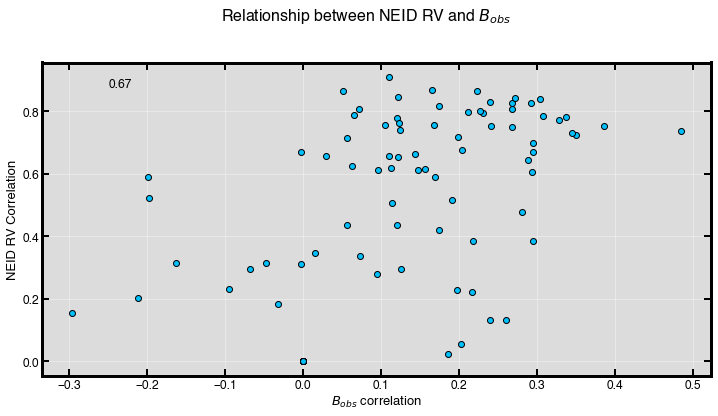

In [49]:
x = Bobs_corr
y = rvsun_corr
xlabel = '$B_{obs}$ correlation'
ylabel = 'NEID RV Correlation'
title = 'Relationship between NEID RV and $B_{obs}$'

plot.correlation_plot(x, y, title, xlabel, ylabel)

Get "good" orders for this situation.

In [ ]:
good_label = np.argmax(rvsun_corr)
good_label = kmeans.labels_[good_label]

good_rvsun_std_orders = order_numbers[kmeans.labels_ == good_label]
good_rvsun_std_coeff = Bobs_corr[kmeans.labels_ == good_label]


In [ ]:
for ind, order in enumerate(good_rvsun_std_orders):
    if ind%5 == 0:
        # wvl_norm = 1. - (np.mean(wvl[ind,:]) - 420.) / (720. - 420.)
        i = str(order)
        i = i.zfill(3)
        rv_ord = component_df[i] * 1e3
        rv_ord_plot = rv_ord - np.median(rv_ord) + ind  # offset the median value for plotting purposes
        plt.plot(date_plot, rv_ord_plot, 'k', lw=3)
        plt.plot(date_plot, rv_ord_plot, c='lightpink', lw=2)
        plt.plot(date_plot, rv_ord_plot,'s', c='lightpink',
                 markersize=8,markeredgewidth=1,markeredgecolor='k')
plt.plot(date_plot, rv_sun - np.median(rv_sun), 'k', lw=3)
plt.plot(date_plot, rv_sun - np.median(rv_sun), c='plum', lw=2)
plt.plot(date_plot, rv_sun - np.median(rv_sun),'s', c='plum',
             markersize=8, markeredgewidth=1, markeredgecolor='k')
plt.xlabel('JD Date since: ' + str(date_jd[0]))
plt.ylabel('RV [m/s]')
plt.title('RVs for High NEID RV Correlated Orders')
plt.show()

## Plot error in each order against correlation

Remove the outlier

In [ ]:
rv_std = np.where(np.array(rv_std) > 40, 0, rv_std)

In [ ]:
x = Bobs_corr
y = rv_std
xlabel = '$B_{obs}$ correlation'
ylabel = 'Order RV Std'
title = 'Relationship between Order RV Std and $B_{obs}$'

plot.correlation_plot(x, y, title, xlabel, ylabel)

In [ ]:
X = np.zeros(shape=(len(rvsun_corr), 2))
X[:, 0] = Bobs_corr
X[:, 1] = rv_std
# X = [rv_std, rv_std]
X = np.where(np.isnan(X), 0, X)

In [ ]:
# X = X.reshape(-1, 1)

kmeans = KMeans(n_clusters=4, init='k-means++').fit(X)

Plot this labeling.

In [ ]:

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.scatter(Bobs_corr[kmeans.labels_ == 0], rv_std[kmeans.labels_ == 0],
            c='lightblue', label='Cluster 1', edgecolors='k', linewidths=1.0)
plt.scatter(Bobs_corr[kmeans.labels_ == 1], rv_std[kmeans.labels_ == 1],
            c='plum', label='Cluster 2', edgecolors='k', linewidths=1.0)
plt.scatter(Bobs_corr[kmeans.labels_ == 2], rv_std[kmeans.labels_ == 2],
            c='lightpink', label='Cluster 3', edgecolors='k', linewidths=1.0)
plt.scatter(Bobs_corr[kmeans.labels_ == 3], rv_std[kmeans.labels_ == 3],
            c='lavender', label='Cluster 4', edgecolors='k', linewidths=1.0)


# plt.xlim([50, 175])
plt.xlabel('$B_{obs}$ Correlation')
plt.ylabel('Standard Deviation')
plt.title('Visualization of clustered $B_{obs}$ correlation and STD', fontweight='bold')

plt.legend()
plt.show()

Get "good" orders for this situation.

In [ ]:
good_label = np.argmax(Bobs_corr)
good_label = kmeans.labels_[good_label]

good_rvsun_std_orders = order_numbers[kmeans.labels_ == good_label]
good_rvsun_std_coeff = Bobs_corr[kmeans.labels_ == good_label]

In [ ]:
# good_rvs = rv_orders[good_rvsun_std_orders]

In [ ]:
for ind, order in enumerate(good_rvsun_std_orders):
    if ind%5 == 0:
        # wvl_norm = 1. - (np.mean(wvl[ind,:]) - 420.) / (720. - 420.)
        i = str(order)
        i = i.zfill(3)
        rv_ord = component_df[i] * 1e3
        rv_ord_plot = rv_ord - np.median(rv_ord) + ind  # offset the median value for plotting purposes
        plt.plot(date_plot, rv_ord_plot, 'k', lw=3)
        plt.plot(date_plot, rv_ord_plot, c='lightpink', lw=2)
        plt.plot(date_plot, rv_ord_plot,'s', c='lightpink',
                 markersize=8,markeredgewidth=1,markeredgecolor='k')
plt.plot(date_plot, Bobs - np.median(Bobs), 'k', lw=3)
plt.plot(date_plot, Bobs - np.median(Bobs), c='plum', lw=2)
plt.plot(date_plot, Bobs - np.median(Bobs),'s', c='plum',
             markersize=8, markeredgewidth=1, markeredgecolor='k')
plt.xlabel('JD Date since: ' + str(date_jd[0]))
plt.ylabel('RV [m/s]')
plt.title('RVs for High $B_{obs}$ RV Correlated Orders')
plt.show()

In [ ]:
x = rvsun_corr
y = rv_std
xlabel = 'NEID RV correlation'
ylabel = 'Order RV Std'
title = 'Relationship between Order RV Std and NEID RV'

plot.correlation_plot(x, y, title, xlabel, ylabel)

### Compare STD and RV Variation

In [ ]:
X = np.zeros(shape=(len(rvsun_corr), 2))
X[:, 0] = rvsun_corr
X[:, 1] = rv_std
# X = [rv_std, rv_std]
X = np.where(np.isnan(X), 0, X)

In [ ]:
# X = X.reshape(-1, 1)

kmeans = KMeans(n_clusters=4, init='k-means++').fit(X)

Plot this labeling.

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.scatter(rvsun_corr[kmeans.labels_ == 0], rv_std[kmeans.labels_ == 0],
            c='lightblue', label='Cluster 1', edgecolors='k', linewidths=1.0)
plt.scatter(rvsun_corr[kmeans.labels_ == 1], rv_std[kmeans.labels_ == 1],
            c='plum', label='Cluster 2', edgecolors='k', linewidths=1.0)
plt.scatter(rvsun_corr[kmeans.labels_ == 2], rv_std[kmeans.labels_ == 2],
            c='lightpink', label='Cluster 3', edgecolors='k', linewidths=1.0)
plt.scatter(rvsun_corr[kmeans.labels_ == 3], rv_std[kmeans.labels_ == 3],
            c='lavender', label='Cluster 4', edgecolors='k', linewidths=1.0)


# plt.xlim([50, 175])
plt.xlabel('NEID RV Correlation')
plt.ylabel('Standard Deviation')
plt.title('Visualization of clustered NEID RV correlation and STD', fontweight='bold')

plt.legend()
plt.show()

Get "good" orders for this situation.

In [ ]:
good_label = np.argmax(rvsun_corr)
good_label = kmeans.labels_[good_label]

good_rvsun_std_orders = order_numbers[kmeans.labels_ == good_label]
good_rvsun_std_coeff = rvsun_corr[kmeans.labels_ == good_label]
good_rvsun_std = rv_std[kmeans.labels_ == good_label]

In [ ]:
# good_rvs = rv_orders[good_rvsun_std_orders]

In [ ]:
for ind, order in enumerate(good_rvsun_std_orders):
    if ind%5 == 0:
        # wvl_norm = 1. - (np.mean(wvl[ind,:]) - 420.) / (720. - 420.)
        i = str(order)
        i = i.zfill(3)
        rv_ord = component_df[i] * 1e3
        rv_ord_plot = rv_ord - np.median(rv_ord) + ind  # offset the median value for plotting purposes
        # rv_ord_plot = rv_ord
        plt.plot(date_plot, rv_ord_plot, 'k', lw=3)
        plt.plot(date_plot, rv_ord_plot, c='lightpink', lw=2)
        plt.plot(date_plot, rv_ord_plot,'s', c='lightpink',
                 markersize=8,markeredgewidth=1,markeredgecolor='k')
plt.plot(date_plot, rv_sun - np.median(rv_sun), 'k', lw=3)
plt.plot(date_plot, rv_sun - np.median(rv_sun), c='plum', lw=2)
plt.plot(date_plot, rv_sun - np.median(rv_sun),'s', c='plum',
             markersize=8, markeredgewidth=1, markeredgecolor='k')
plt.xlabel('JD Date since: ' + str(date_jd[0]))
plt.ylabel('RV [m/s]')
plt.title('RVs for High NEID RV Correlated Orders')
plt.show()

## Get radial velocities least correlated with orders

$ \frac{\sum_i\frac{RV_{i, j}{\sigma^2_{RV_{i, j}}}}{\sum_i\sigma^2_{RV_{i, j}}} $

In [ ]:
rv_sigma = [s ** 2 for s in good_rvsun_std]
rvs = [component_df[str(o).zfill(3)] * 1e3 for o in good_rvsun_std_orders]
correlated_rvs = [np.nansum(rvs[i]/(rv_sigma[i] * len(rv_sun))) / np.nansum(1/(rv_sigma[i] * len(rv_sun))) for i in range(0, len(rv_sun))]

In [ ]:
x = correlated_rvs
y = rv_sun
xlabel = 'Correlated RV'
ylabel = 'NEID RV'
title = 'Comparison of Correlated and NEID RVs'

plot.correlation_plot(x, y, title, xlabel, ylabel)


In [ ]:
x = date_jd
y_list = [correlated_rvs, rv_sun]
xlabel = 'JD Date'
ylabel_list = ['Correlated RV', 'NEID RV']
title = 'Comparison of Correlated and NEID RVs'

plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)